In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd
import seaborn as sns

In [2]:
files = []
for dirname, _, filenames in os.walk('./data/raw'):
    for filename in filenames:
        files.append(os.path.join(dirname, filename))
        print(os.path.join(dirname, filename))

./data/raw\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
./data/raw\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
./data/raw\Friday-WorkingHours-Morning.pcap_ISCX.csv
./data/raw\Monday-WorkingHours.pcap_ISCX.csv
./data/raw\Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
./data/raw\Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
./data/raw\Tuesday-WorkingHours.pcap_ISCX.csv
./data/raw\Wednesday-workingHours.pcap_ISCX.csv


In [3]:
files = [
    [
        # Train - 월요일
        './data/raw\Monday-WorkingHours.pcap_ISCX.csv'
    ],
    [
        # Test - 화요일
        './data/raw\Tuesday-WorkingHours.pcap_ISCX.csv'
    ],
    [
        # Test - 수요일
        './data/raw\Wednesday-workingHours.pcap_ISCX.csv'
    ], 
    # 목요일은 에러로 인해 작동 X
    [
        # Test - 금요일
        './data/raw\Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv',
        './data/raw\Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv',
    ],
    [
        # Test - 금요일_Bot
        './data/raw\Friday-WorkingHours-Morning.pcap_ISCX.csv',
    ],
]

# Train Data

In [4]:
from Utils import FlowReader

In [5]:
trainSet = FlowReader.read_csv(files[0])

## 프로파일링

In [6]:
from Utils import FlowProfiler

In [7]:
FlowProfiler.UNIT_TIME=5

In [8]:
trainSet = FlowProfiler.preprocessing(trainSet, mode="default")

In [9]:
trainSet

,Key_IP,Key_inner_port,Key_outer_port,Inner_port_freq,Outer_port_freq,Pst_per_flows,Card_inner_ip,Card_inner_port,Card_outer_port,Sum_inner_pkts,...,Sum_outer_pkts,Avg_outer_pkts,Std_outer_pkts,Sum_outer_bytes,Avg_outer_bytes,Std_outer_bytes,Sum_dur,Avg_dur,Std_dur,Label
0,8.254.250.126,49188,80,1.000000,1.000000,0.250000,1,1,1,0,...,8,2.000000,0.000000,48.0,12.000000,0.000000,7,1.750000e+00,1.500000e+00,[BENIGN]
1,8.253.185.121,49486,80,1.000000,1.000000,0.250000,1,1,1,0,...,8,2.000000,0.000000,48.0,12.000000,0.000000,6,1.500000e+00,1.000000e+00,[BENIGN]
2,192.168.10.9,88,1029,0.359551,0.033708,0.595506,1,12,67,534,...,634,7.123596,9.254999,126316.0,1419.280899,2412.947843,501301496,5.632601e+06,1.611198e+07,[BENIGN]
3,192.168.10.3,137,389,0.150000,0.450000,0.400000,4,14,7,24,...,54,2.700000,1.625455,880.0,44.000000,89.865396,6093478,3.046739e+05,9.377045e+05,[BENIGN]
4,69.31.33.224,1057,80,1.000000,1.000000,1.000000,1,1,1,5,...,4,2.000000,2.828427,191.0,95.500000,135.057395,40647,2.032350e+04,2.873611e+04,[BENIGN]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47692,184.25.56.202,7173,80,1.000000,1.000000,1.000000,1,1,1,1,...,1,1.000000,0.000000,6.0,6.000000,0.000000,42,4.200000e+01,0.000000e+00,[BENIGN]
47693,184.50.238.170,56432,80,1.000000,1.000000,1.000000,1,1,1,1,...,1,1.000000,0.000000,6.0,6.000000,0.000000,42,4.200000e+01,0.000000e+00,[BENIGN]
47694,52.52.86.145,44944,443,1.000000,1.000000,1.000000,1,1,1,14,...,13,13.000000,0.000000,4752.0,4752.000000,0.000000,52656124,5.265612e+07,0.000000e+00,[BENIGN]
47695,54.236.177.89,55806,443,1.000000,1.000000,1.000000,1,1,1,15,...,13,13.000000,0.000000,5955.0,5955.000000,0.000000,51998174,5.199817e+07,0.000000e+00,[BENIGN]


## 전처리

In [10]:
from Utils import FlowPreProcessor

In [11]:
fpp = FlowPreProcessor(mode="concat")

In [12]:
trainX = fpp.fit_transform(trainSet)

In [13]:
trainX.shape

(47697, 45)

In [14]:
trainX

array([[2.0965679e-05, 1.2579407e-04, 2.7913705e-01, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [2.0965679e-05, 1.2579407e-04, 2.7913705e-01, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00],
       [7.5728036e-02, 7.5476448e-04, 2.0965679e-05, ..., 9.0055447e-03,
        2.4988214e-02, 2.9361390e-03],
       ...,
       [4.4027925e-04, 6.2897037e-05, 9.8222113e-01, ..., 1.0000000e+00,
        2.8288544e-03, 1.0000000e+00],
       [6.2897037e-05, 1.2579407e-04, 9.8222113e-01, ..., 1.0000000e+00,
        3.6146471e-03, 1.0000000e+00],
       [5.8682937e-02, 8.6944669e-02, 7.9334132e-02, ..., 1.0000000e+00,
        1.0000000e+00, 1.0000000e+00]], dtype=float32)

# 학습하기

In [15]:
import torch

import torch.nn as nn

from tqdm.notebook import tqdm
from torch.optim import Adam, SGD, AdamW
from torch.optim.lr_scheduler import StepLR
from torch.utils.data import DataLoader, Dataset

In [16]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [17]:
class FClayer(nn.Module):
    def __init__(self, I, O, A='relu'):
        super().__init__()
        
        self.linear = nn.Linear(I, O)
        
        if A == 'relu':
            self.activation = nn.ReLU()
        elif A == 'sigmoid':
            self.activation = nn.Sigmoid()
        else:
            self.activation = nn.Identity()
        
    def forward(self, x):
        x = self.linear(x)
        x = self.activation(x)
        
        return x

In [18]:
class AE(nn.Module):
    def __init__(self, num_features):
        super().__init__()
        
        self.encoder = nn.Sequential(
            FClayer(num_features, 128),
            FClayer(128, 64),
            FClayer(64,32),
            FClayer(32, 16),
            FClayer(16, 8),
        )
        
        self.decoder = nn.Sequential(
            FClayer(8, 16),
            FClayer(16, 32),
            FClayer(32, 64),
            FClayer(64, 128),
            FClayer(128, num_features, 
                    A='sigmoid'
            ),
        )
    
    def forward(self, x):
        z = self.encoder(x)
        x = self.decoder(z)
        return x, z

In [19]:
a = AE(trainX.shape[1])

In [20]:
b = a(torch.tensor(trainX))

In [21]:
trainSet

,Key_IP,Key_inner_port,Key_outer_port,Inner_port_freq,Outer_port_freq,Pst_per_flows,Card_inner_ip,Card_inner_port,Card_outer_port,Sum_inner_pkts,...,Sum_outer_pkts,Avg_outer_pkts,Std_outer_pkts,Sum_outer_bytes,Avg_outer_bytes,Std_outer_bytes,Sum_dur,Avg_dur,Std_dur,Label
0,8.254.250.126,49188,80,1.000000,1.000000,0.250000,1,1,1,0,...,8,2.000000,0.000000,48.0,12.000000,0.000000,7,1.750000e+00,1.500000e+00,[BENIGN]
1,8.253.185.121,49486,80,1.000000,1.000000,0.250000,1,1,1,0,...,8,2.000000,0.000000,48.0,12.000000,0.000000,6,1.500000e+00,1.000000e+00,[BENIGN]
2,192.168.10.9,88,1029,0.359551,0.033708,0.595506,1,12,67,534,...,634,7.123596,9.254999,126316.0,1419.280899,2412.947843,501301496,5.632601e+06,1.611198e+07,[BENIGN]
3,192.168.10.3,137,389,0.150000,0.450000,0.400000,4,14,7,24,...,54,2.700000,1.625455,880.0,44.000000,89.865396,6093478,3.046739e+05,9.377045e+05,[BENIGN]
4,69.31.33.224,1057,80,1.000000,1.000000,1.000000,1,1,1,5,...,4,2.000000,2.828427,191.0,95.500000,135.057395,40647,2.032350e+04,2.873611e+04,[BENIGN]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47692,184.25.56.202,7173,80,1.000000,1.000000,1.000000,1,1,1,1,...,1,1.000000,0.000000,6.0,6.000000,0.000000,42,4.200000e+01,0.000000e+00,[BENIGN]
47693,184.50.238.170,56432,80,1.000000,1.000000,1.000000,1,1,1,1,...,1,1.000000,0.000000,6.0,6.000000,0.000000,42,4.200000e+01,0.000000e+00,[BENIGN]
47694,52.52.86.145,44944,443,1.000000,1.000000,1.000000,1,1,1,14,...,13,13.000000,0.000000,4752.0,4752.000000,0.000000,52656124,5.265612e+07,0.000000e+00,[BENIGN]
47695,54.236.177.89,55806,443,1.000000,1.000000,1.000000,1,1,1,15,...,13,13.000000,0.000000,5955.0,5955.000000,0.000000,51998174,5.199817e+07,0.000000e+00,[BENIGN]


In [22]:
b[0].shape

torch.Size([47697, 45])

In [23]:
class FlowDataset(Dataset):
    def __init__(self, data):
        self.data = data
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]


In [24]:
def train_fn(trainX, batch_size=128, epoch=300, model_path="./models/ipod_model_concat.pt"):
    ae = AE(trainX.shape[1])
    ae.to(device)
    
    ae_loss_fn = nn.MSELoss()
    # ae_optim = SGD(ae.parameters(), lr = 1e-1, momentum=0.9)
    ae_optim = AdamW(ae.parameters(), lr = 1e-3, weight_decay=1e-11)
    ae_sched= StepLR(ae_optim, step_size=75, gamma=0.5)
    
    dataloader = DataLoader(
        FlowDataset(trainX), 
        batch_size=batch_size, 
        shuffle=True
    )
    
    best_loss = 1.

    with tqdm(range(epoch)) as pbar:
        for _ in pbar:
            ae_epoch_loss = 0
            data_count = 0
                        
            for X in dataloader:
                X = X.to(device)

                # 오토 인코더 학습 
                O, _ = ae(X)
                
                ae_loss = ae_loss_fn(O, X)
                ae_optim.zero_grad()
                ae_loss.backward()
                ae_optim.step()                
                
                # loss 출력하기 
                
                ae_epoch_loss += ae_loss.item()
                data_count += len(X)

                pbar.set_postfix( 
                     ae_loss=f"{ae_epoch_loss / data_count}",
                )

            now_loss = ae_epoch_loss / data_count
            if best_loss > now_loss:
                best_loss = now_loss
                torch.save(ae.state_dict(), model_path)

            ae_sched.step()
    print(best_loss)
    model_state_dict = torch.load(model_path, map_location=device)
    ae.load_state_dict(model_state_dict)
    return ae

In [25]:
model = train_fn(trainX)

  0%|          | 0/300 [00:00<?, ?it/s]

6.712402209372553e-06


# 테스트하기

In [26]:
def test_fn(model, testX):
    dataloader = DataLoader(FlowDataset(testX), batch_size= 512, shuffle=False)
    model.to(device)
    pred = []
    loss_fn = nn.MSELoss()
    model.eval()
    dist_fn = nn.CosineSimilarity(dim=1)
    with torch.no_grad():
        for X in (dataloader):
            X = X.to(device)
            O,_  = model(X)
            # dist = dist_fn(X,O)
            dist = torch.square(X-O).mean(-1)
            pred.extend(dist.cpu().tolist())
    return pred
    

In [27]:
def labelEncoding(x):
    if len(x) == 1:
        if x[0] == 'BENIGN':
            return 0
        else:
            return 1
    else:
        return 1



In [28]:
from sklearn.metrics import roc_auc_score, roc_curve, f1_score, precision_score, recall_score, accuracy_score

In [29]:
def testSetLoader(files):
    testSet = FlowReader.read_csv(files)
    testSet = FlowProfiler.preprocessing(testSet, mode="default")
    return testSet

In [30]:
def result_fn(testSet, loss):
    result = pd.DataFrame({
        'outer_ip' : testSet['Key_IP'],
        'loss' : loss,
        'Label' : testSet['Label'],
        'Num_Label' : testSet['Label'].apply(
            labelEncoding
            # lambda x : len(x)
        )
    })
    return result

In [31]:
def best_f1(y_true, loss):
    theta = 0.0001
    best_theta = 0
    best_f1 = 0
    while theta <= 1:
        predict = np.where(loss>theta, 1, 0)
        now_f1 = f1_score(y_true, predict)
        if best_f1 < now_f1:
            best_f1 = now_f1
            best_theta = theta
        
        theta += 0.0001

    predict = np.where(loss>best_theta, 1, 0)
    print("theta : ", best_theta)
    print("accuracy : ", accuracy_score(y_true, predict))
    print("recall : ", recall_score(y_true, predict))
    print("precision: ", precision_score(y_true, predict))
    print("f1-score : ", f1_score(y_true, predict))

    return best_theta

In [32]:
concat_result = pd.DataFrame(columns=['outer_ip', 'loss', 'Label', 'Num_Label'])

## 화요일

In [33]:
testSet = testSetLoader(files[1])

In [34]:
testX = fpp.transform(testSet)

In [35]:
loss = test_fn(model, testX)

In [36]:
result = result_fn(testSet, loss)

In [37]:
result[result['Num_Label']==1]

,outer_ip,loss,Label,Num_Label
2120,172.16.0.1,0.001802,[FTP-Patator],1
2143,172.16.0.1,0.000124,[FTP-Patator],1
2529,172.16.0.1,0.001153,[FTP-Patator],1
2951,172.16.0.1,0.045419,[FTP-Patator],1
3946,172.16.0.1,0.045343,[FTP-Patator],1
4002,172.16.0.1,0.045449,[FTP-Patator],1
5133,172.16.0.1,0.045419,[FTP-Patator],1
5796,172.16.0.1,0.045413,[FTP-Patator],1
5838,172.16.0.1,0.045457,[FTP-Patator],1
7054,172.16.0.1,0.045435,[FTP-Patator],1


In [38]:
concat_result = pd.concat([
    concat_result, result
])

In [39]:
y_true = result['Num_Label'].values
loss = result['loss'].values

In [40]:
tues_fp, tues_tp, _ = roc_curve(y_true, loss)
roc_auc_score(y_true, loss)

0.9820328918596134

In [41]:
theta = best_f1(y_true, loss)

theta :  0.04140000000000016
accuracy :  0.9971400083963057
recall :  0.8275862068965517
precision:  0.1875
f1-score :  0.30573248407643316


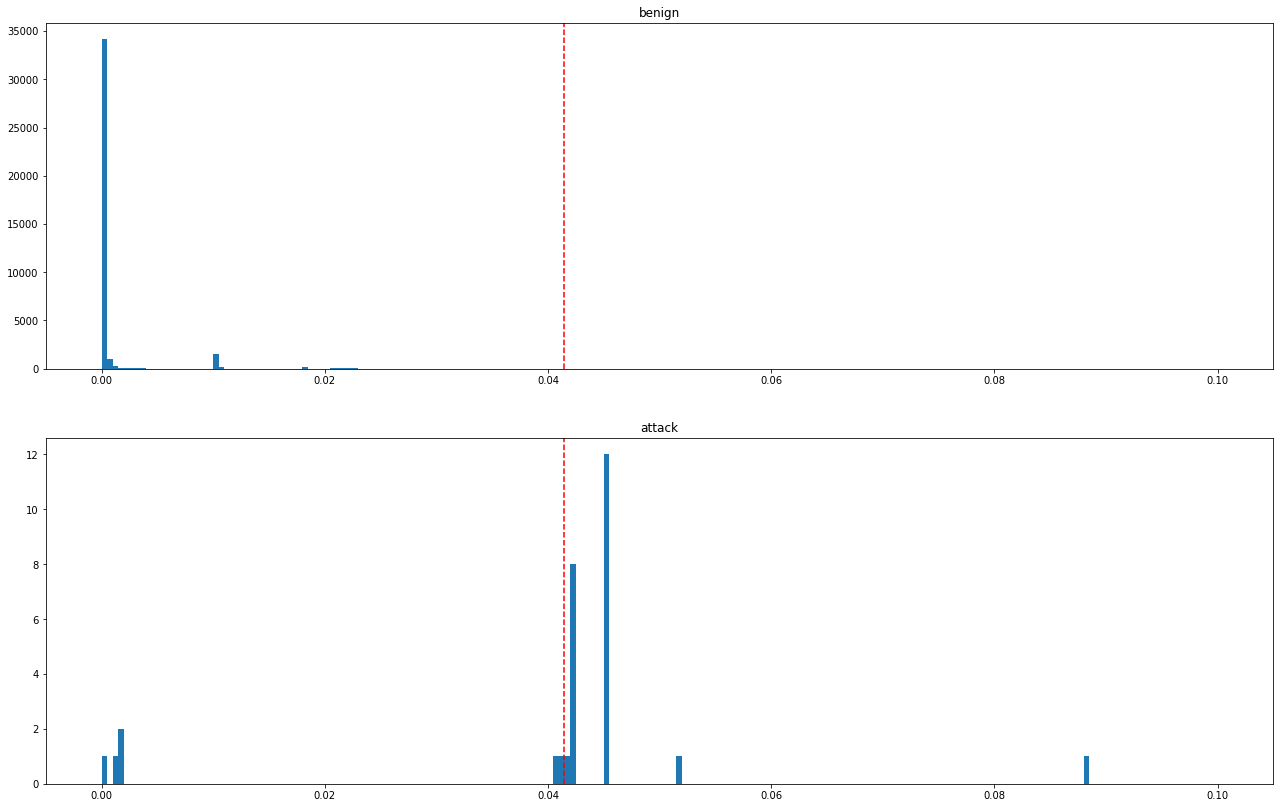

In [42]:
_, axs = plt.subplots(2,1, figsize=(22,14))
titles = ['benign', 'attack']

for i in range(2):
    axs[i].hist(result[result['Num_Label'] == i]['loss'], bins=200, range=(0,0.1))
    axs[i].axvline(x=theta, color='r', linestyle='--')
    axs[i].set_title(titles[i])


## 수요일

In [43]:
testSet = testSetLoader(files[2])

In [44]:
testX = fpp.transform(testSet)

In [45]:
loss = test_fn(model, testX)

In [46]:
result = result_fn(testSet, loss)

In [47]:
result[result['Num_Label']==1]

,outer_ip,loss,Label,Num_Label
1721,172.16.0.1,0.000120,[DoS slowloris],1
1748,172.16.0.1,0.000248,"[DoS slowloris, BENIGN]",1
5575,172.16.0.1,0.068133,[DoS slowloris],1
5751,172.16.0.1,0.004087,"[DoS slowloris, BENIGN]",1
6592,172.16.0.1,0.297327,"[DoS slowloris, BENIGN]",1
7043,172.16.0.1,0.314612,"[DoS slowloris, BENIGN]",1
7689,172.16.0.1,0.323770,[DoS slowloris],1
8116,172.16.0.1,0.296519,"[DoS slowloris, BENIGN]",1
8581,172.16.0.1,0.052798,"[DoS slowloris, BENIGN]",1
9177,172.16.0.1,0.359185,"[DoS Slowhttptest, BENIGN]",1


In [48]:
concat_result = pd.concat([
    concat_result, result
])

In [49]:
y_true = result['Num_Label'].values
loss = result['loss'].values

In [50]:
wednes_fp, wednes_tp, _ = roc_curve(y_true, loss)
roc_auc_score(y_true, loss)

0.9785927126352658

In [51]:
theta = best_f1(y_true, loss)

theta :  0.25669999999998805
accuracy :  0.999712681206739
recall :  0.7037037037037037
precision:  0.8636363636363636
f1-score :  0.7755102040816326


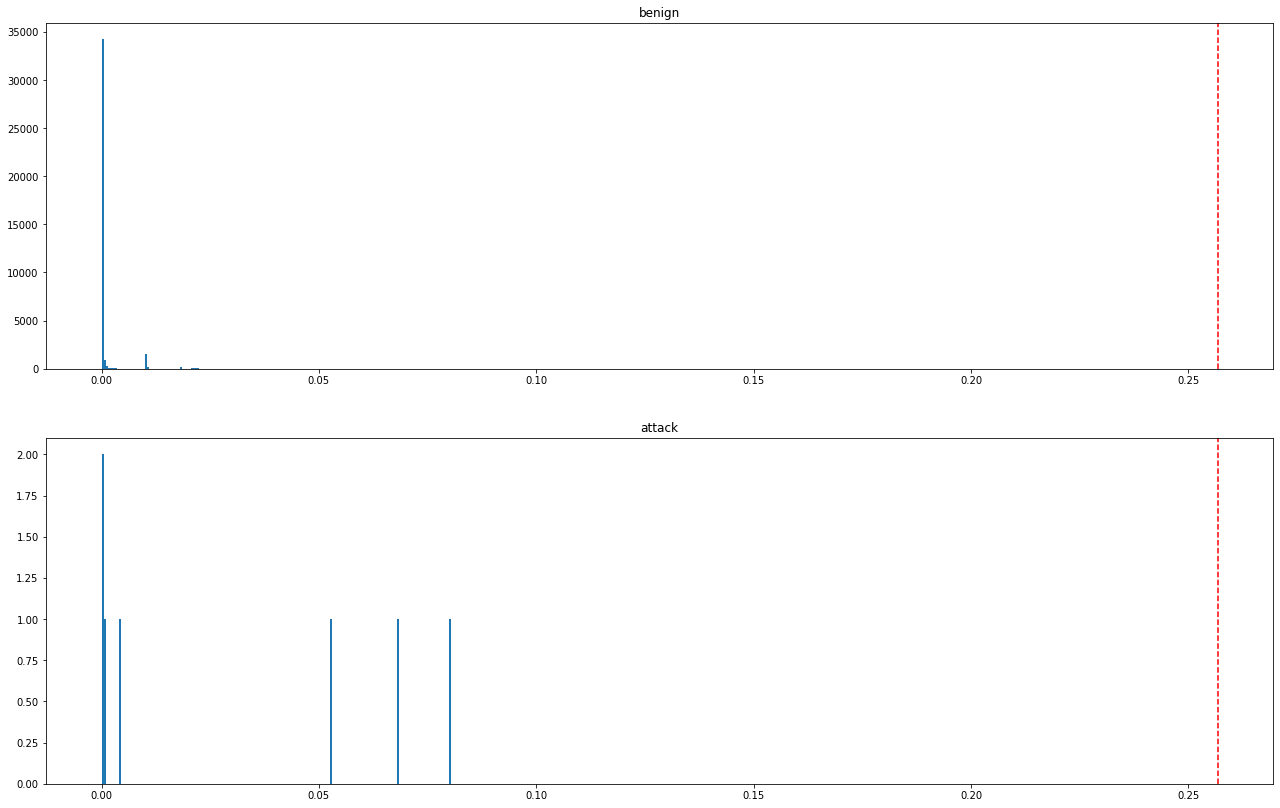

In [52]:
_, axs = plt.subplots(2,1, figsize=(22,14))
titles = ['benign', 'attack']

for i in range(2):
    axs[i].hist(result[result['Num_Label'] == i]['loss'], bins=200, range=(0,0.1))
    axs[i].axvline(x=theta, color='r', linestyle='--')
    axs[i].set_title(titles[i])


## 금요일 
- 목요일은 이유를 알 수 없는 에러로 인해 스킵

In [53]:
testSet = testSetLoader(files[3])

In [54]:
testX = fpp.transform(testSet)

In [55]:
loss = test_fn(model, testX)

In [56]:
result = result_fn(testSet, loss)

In [57]:
result[result['Num_Label']==1]

,outer_ip,loss,Label,Num_Label
1656,172.16.0.1,57.442108,[DDoS],1
1984,172.16.0.1,110.482109,[DDoS],1
2247,172.16.0.1,95.275726,[DDoS],1
2288,192.168.10.50,2.101666,"[BENIGN, DDoS]",1
2480,172.16.0.1,91.960129,[DDoS],1
2928,172.16.0.1,2.285426,"[DDoS, BENIGN]",1
5849,172.16.0.1,0.000856,[PortScan],1
9213,172.16.0.1,0.000120,[PortScan],1
9452,172.16.0.1,0.021217,[PortScan],1
9742,172.16.0.1,0.023879,[PortScan],1


In [58]:
concat_result = pd.concat([
    concat_result, result
])

In [59]:
y_true = result['Num_Label'].values
loss = result['loss'].values

In [60]:
fri_fp, fri_tp, _ = roc_curve(y_true, loss)
roc_auc_score(y_true, loss)

0.9778956760029316

In [61]:
theta = best_f1(y_true, loss)

theta :  0.09780000000000177
accuracy :  0.999197845642583
recall :  0.5555555555555556
precision:  0.625
f1-score :  0.5882352941176471


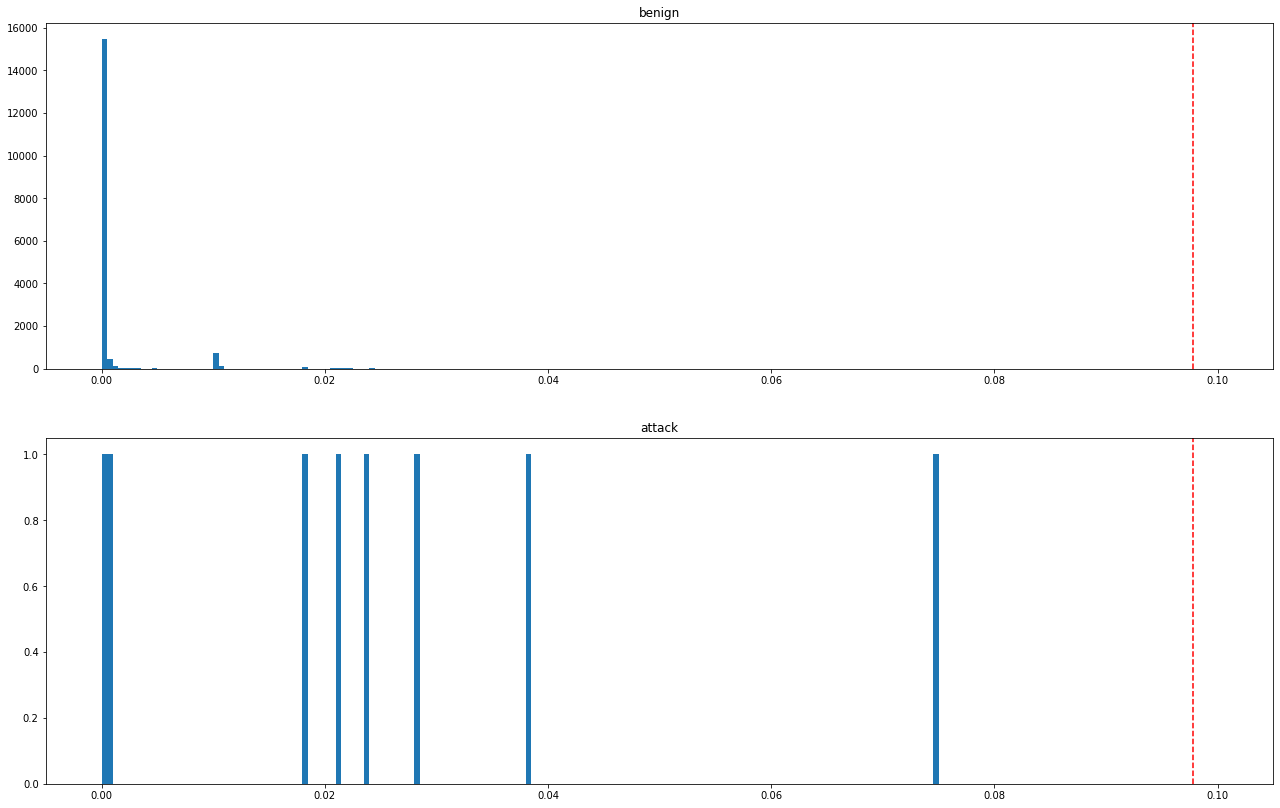

In [62]:
_, axs = plt.subplots(2,1, figsize=(22,14))
titles = ['benign', 'attack']

for i in range(2):
    axs[i].hist(result[result['Num_Label'] == i]['loss'], bins=200, range=(0,0.1))
    axs[i].axvline(x=theta, color='r', linestyle='--')
    axs[i].set_title(titles[i])


## 금요일 BOT

In [63]:
testSet = testSetLoader(files[4])

In [64]:
testX = fpp.transform(testSet)

In [65]:
loss = test_fn(model, testX)

In [66]:
result = result_fn(testSet, loss)

In [67]:
result[result['Num_Label']==1]

,outer_ip,loss,Label,Num_Label
2471,52.6.13.28,0.000107,[Bot],1
2511,52.6.13.28,0.000102,[Bot],1
5408,205.174.165.73,0.001389,[Bot],1
5535,205.174.165.73,0.000884,[Bot],1
6068,205.174.165.73,0.000594,[Bot],1
6531,205.174.165.73,0.000406,[Bot],1
6963,205.174.165.73,0.000619,[Bot],1
7590,205.174.165.73,0.052113,[Bot],1
8265,205.174.165.73,0.024082,[Bot],1
8913,205.174.165.73,0.025085,[Bot],1


In [68]:
concat_result = pd.concat([
    concat_result, result
])

In [69]:
y_true = result['Num_Label'].values
loss = result['loss'].values

In [70]:
bot_fp, bot_tp, _ = roc_curve(y_true, loss)
roc_auc_score(y_true, loss)

0.9604148926104645

In [71]:
theta = best_f1(y_true, loss)

theta :  0.02389999999999991
accuracy :  0.9945348904101708
recall :  0.717948717948718
precision:  0.25
f1-score :  0.3708609271523179


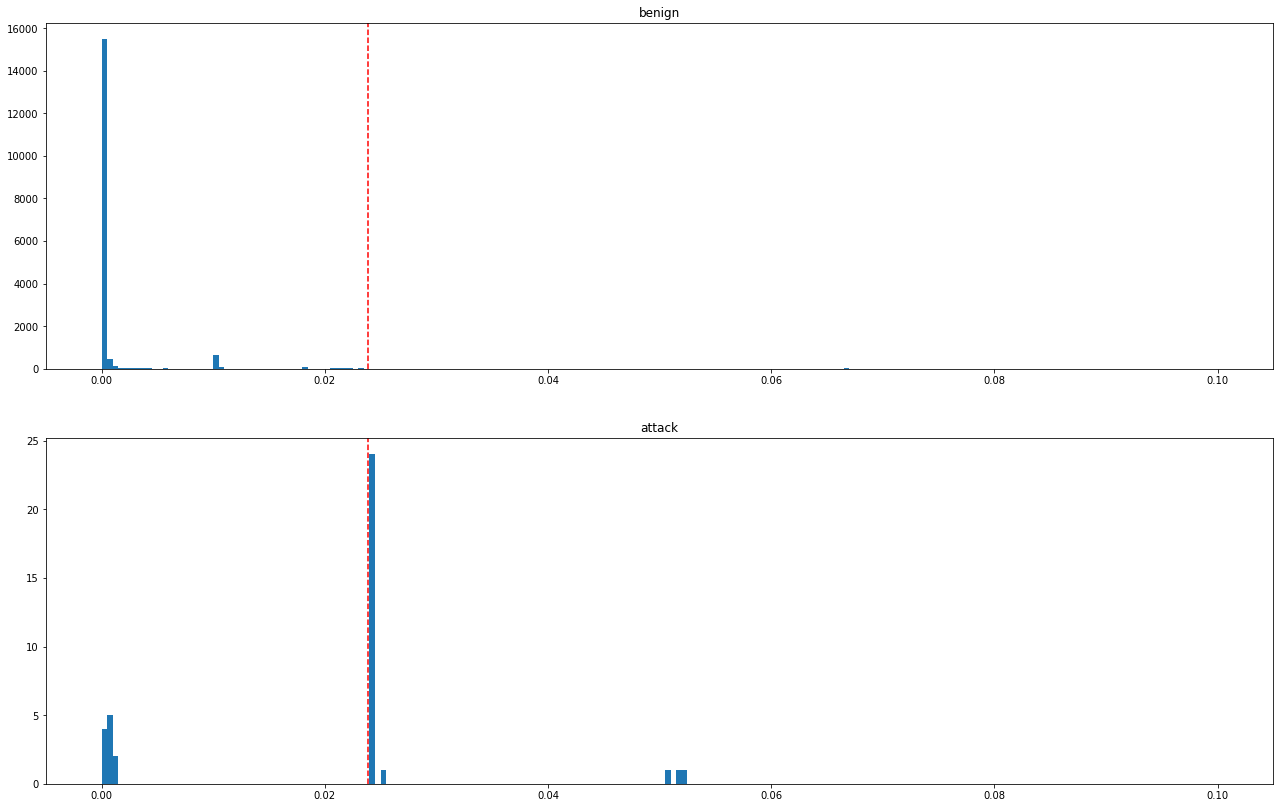

In [72]:
_, axs = plt.subplots(2,1, figsize=(22,14))
titles = ['benign', 'attack']

for i in range(2):
    axs[i].hist(result[result['Num_Label'] == i]['loss'], bins=200, range=(0,0.1))
    axs[i].axvline(x=theta, color='r', linestyle='--')
    axs[i].set_title(titles[i])


## ROC 곡선 그리기

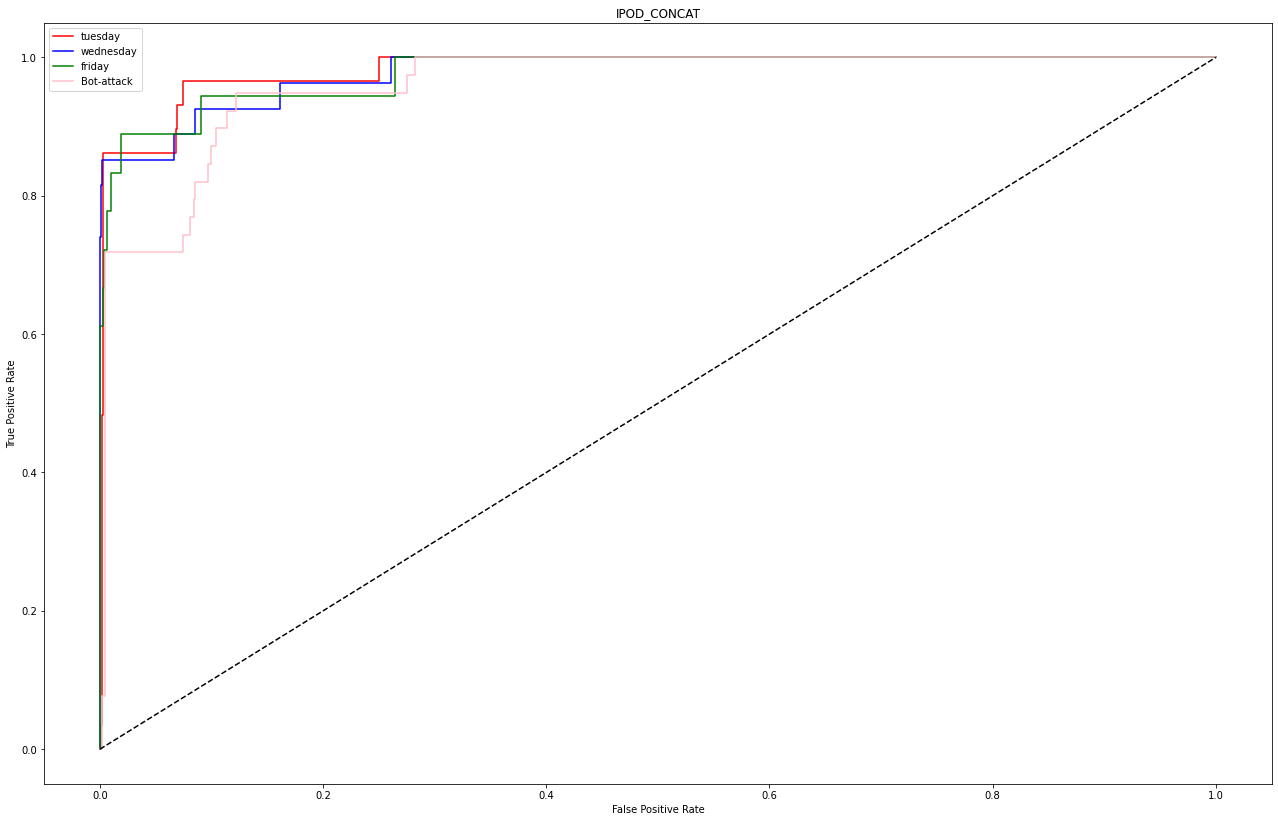

In [73]:
plt.figure(figsize=(22,14))

plt.plot(tues_fp, tues_tp, color='red', label='tuesday')
plt.plot(wednes_fp, wednes_tp, color='blue', label='wednesday')
plt.plot(fri_fp, fri_tp, color='green', label='friday')
plt.plot(bot_fp, bot_tp, color='pink', label='Bot-attack')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('IPOD_CONCAT')
plt.legend()
plt.show()

In [74]:
concat_result[concat_result['Num_Label']==1].describe()

,loss
count,113.000000
mean,29.895429
std,152.011875
min,0.000102
25%,0.024193
50%,0.042189
75%,0.104451
max,1018.309814


In [75]:
y_true = concat_result['Num_Label'].values
y_true = y_true.astype(np.int64)
loss = concat_result['loss'].values

In [76]:
y_true

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [77]:
roc_auc_score(y_true, loss)

0.973257086335748

In [78]:
theta = best_f1(y_true, loss)

theta :  0.25669999999998805
accuracy :  0.9991549270450316
recall :  0.23893805309734514
precision:  0.7714285714285715
f1-score :  0.36486486486486486


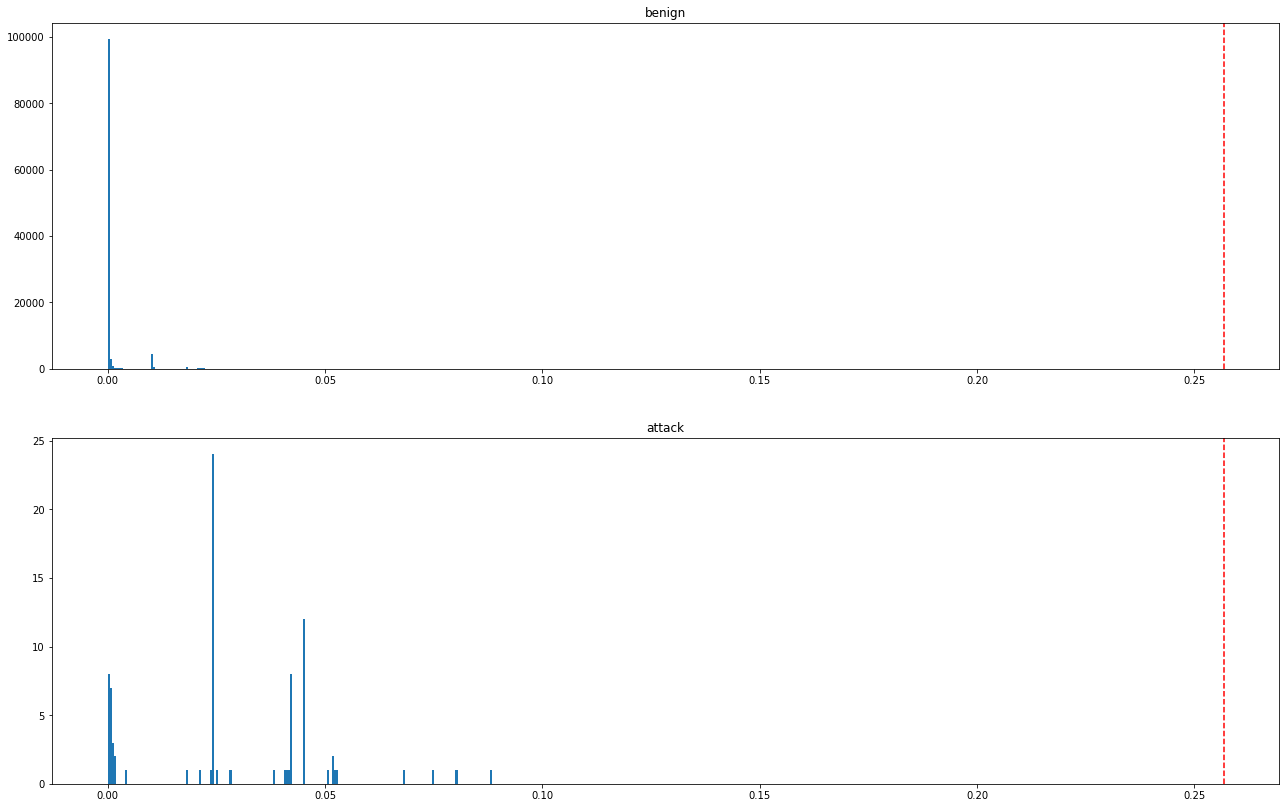

In [79]:
_, axs = plt.subplots(2,1, figsize=(22,14))
titles = ['benign', 'attack']

for i in range(2):
    axs[i].hist(concat_result[concat_result['Num_Label'] == i]['loss'], bins=200, range=(0,0.1))
    axs[i].axvline(x=theta, color='r', linestyle='--')
    axs[i].set_title(titles[i])
